<a href="https://colab.research.google.com/github/adityav1810/Driver-Distraction-Detection/blob/master/driver_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='/content/drive/My Drive/Driver-Detection/data/train'


In [ ]:
import os
import pandas as pd
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf
import pathlib

In [ ]:
data_dir = pathlib.Path(path)

In [ ]:
data_dir

PosixPath('/content/drive/My Drive/Driver-Detection/data/train')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

100


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 10 classes.
Using 80 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 10 classes.
Using 20 files for validation.


In [ ]:

class_names = train_ds.class_names
print(class_names)

['c0_safe_driving', 'c1_texting_right', 'c2_talking_phone_right', 'c3_texting_left', 'c4_talking_phone_left', 'c5_operating_the_radio', 'c6_drinking', 'c7_reaching_behind', 'c8_hair_and_makeup', 'c9_talking_to_passenger']


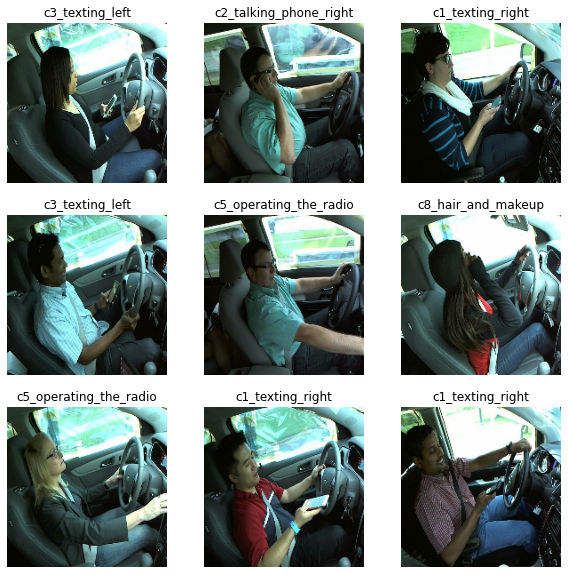

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 10

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
3/3 [==============================] - 0s 64ms/step - loss: 2.4754 - accuracy: 0.0750 - val_loss: 2.3036 - val_accuracy: 0.1500
Epoch 2/50
3/3 [==============================] - 0s 30ms/step - loss: 2.2568 - accuracy: 0.2250 - val_loss: 2.2996 - val_accuracy: 0.1000
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: 2.2170 - accuracy: 0.2375 - val_loss: 2.2955 - val_accuracy: 0.3000
Epoch 4/50
3/3 [==============================] - 0s 33ms/step - loss: 2.1139 - accuracy: 0.4250 - val_loss: 2.2796 - val_accuracy: 0.2000
Epoch 5/50
3/3 [==============================] - 0s 28ms/step - loss: 1.9439 - accuracy: 0.4625 - val_loss: 2.2261 - val_accuracy: 0.3000
Epoch 6/50
3/3 [==============================] - 0s 27ms/step - loss: 1.6571 - accuracy: 0.5750 - val_loss: 2.0423 - val_accuracy: 0.3500
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 1.2550 - accuracy: 0.6500 - val_loss: 2.1313 - val_accuracy: 0.4000
Epoch 8/50
3/3 [===========

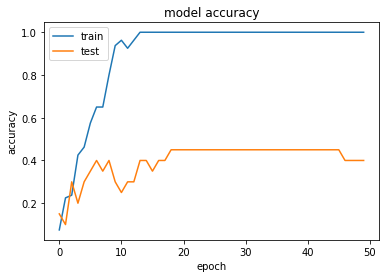

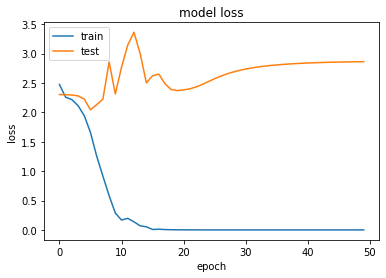

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

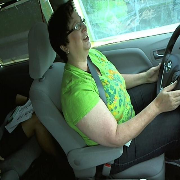

'c0_safe_driving'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img_test_path='/content/drive/My Drive/Driver-Detection/data/test/img_100030.jpg'
img = cv2.imread(img_test_path)

img = cv2.resize(img,(180,180))
cv2_imshow(img)

img = np.reshape(img,[1,180,180,3])

classes=np.argmax(model.predict(img), axis=-1)
class_name=['c0_safe_driving', 'c1_texting_right', 'c2_talking_phone_right', 'c3_texting_left', 'c4_talking_phone_left', 'c5_operating_the_radio', 'c6_drinking', 'c7_reaching_behind', 'c8_hair_and_makeup', 'c9_talking_to_passenger']

class_name[classes[0]]